In [84]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#from sklearn.model_selection import train_test_split

In [85]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst) 
#Define Helper Functions

In [86]:
def load_data():
    """Loads the California housing dataset and returns features, target, and feature names."""
    california = fetch_california_housing()  # ✅ Fetch dataset
    print(california.DESCR)  # ✅ Print dataset description
    X = california.data  # ✅ Feature matrix
    Y = california.target  # ✅ Target variable
    names = california.feature_names  # ✅ Feature names
    return X, Y, names


In [87]:
def scale_data(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X
#Function to Scale Data

In [88]:
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    return X_train, X_test, Y_train, Y_test
#Function to Split Data into Training and Testing Sets

In [89]:
def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train
#Function to Calculate Root Mean Square Error (RMSE)

In [90]:
def plot_real_vs_predicted(y_pred, y_test):
    plt.plot(y_pred, y_test, 'ro')
    plt.plot([0, 50], [0, 50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()
    return plt
#Function to Plot Real vs Predicted Values

In [91]:
def generate_regression_values(model, X, y):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    newX = pd.DataFrame({"Constant": np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y - predictions) ** 2)) / (len(newX) - len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1))) for i in ts_b]

    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    params = np.round(params, 4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["t values"], myDF3[
        "Probabilites"
    ] = [params, sd_b, ts_b, p_values]
    print(myDF3)
#Function to Generate Regression Statistics

In [92]:
X,Y,names = load_data()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [93]:
np.set_printoptions(precision=2, linewidth=100, suppress=True, edgeitems=2)

In [94]:
X[0:5]

array([[   8.33,   41.  ,    6.98,    1.02,  322.  ,    2.56,   37.88, -122.23],
       [   8.3 ,   21.  ,    6.24,    0.97, 2401.  ,    2.11,   37.86, -122.22],
       [   7.26,   52.  ,    8.29,    1.07,  496.  ,    2.8 ,   37.85, -122.24],
       [   5.64,   52.  ,    5.82,    1.07,  558.  ,    2.55,   37.85, -122.25],
       [   3.85,   52.  ,    6.28,    1.08,  565.  ,    2.18,   37.85, -122.25]])

In [95]:
X = scale_data(X)

In [96]:
X_train, X_test, Y_train, Y_test = split_data(X,Y)

Linear model:  -0.895 * Latitude + -0.87 * Longitude + 0.845 * MedInc + 0.369 * AveBedrms + -0.302 * AveRooms + 0.12 * HouseAge + -0.034 * AveOccup + -0.0 * Population
Root Mean Square Error: 0.7327814505957735


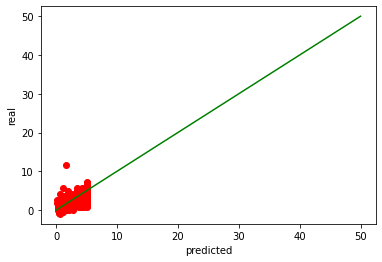

<module 'matplotlib.pyplot' from 'C:\\Users\\Shubham\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [97]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

print ("Linear model: ", pretty_print_linear(linreg.coef_, names, sort = True))

# Predict the values using the model
Y_lin_predict = linreg.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: {}".format(root_mean_square_error(Y_lin_predict,Y_test)))
plot_real_vs_predicted(Y_test,Y_lin_predict)

In [98]:
generate_regression_values(linreg, X_test, Y_test)

   Coefficients  Standard Errors  t values  Probabilites
0        2.0666            0.009   231.754         0.000
1        0.8452            0.015    57.826         0.000
2        0.1202            0.010    12.064         0.000
3       -0.3018            0.027   -11.218         0.000
4        0.3692            0.023    16.399         0.000
5       -0.0001            0.010    -0.009         0.993
6       -0.0343            0.064    -0.538         0.591
7       -0.8952            0.028   -32.372         0.000
8       -0.8697            0.027   -32.004         0.000


Lasso model:  0.494 * MedInc + 0.0 * HouseAge + 0.0 * AveRooms + -0.0 * AveBedrms + -0.0 * Population + -0.0 * AveOccup + -0.0 * Latitude + -0.0 * Longitude
Root Mean Square Error:  0.8909092194704069


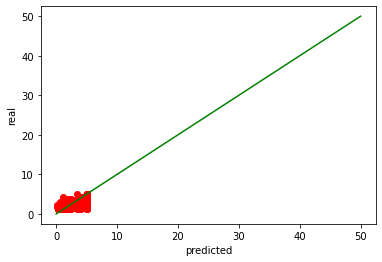

<module 'matplotlib.pyplot' from 'C:\\Users\\Shubham\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [99]:
# Create lasso regression object
lasso = Lasso(alpha=.3)

# Train the model using the training sets
lasso.fit(X_train, Y_train) 

print ("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))

# Predict the values using the model
Y_lasso_predict = lasso.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: ", root_mean_square_error(Y_lasso_predict,Y_test))
plot_real_vs_predicted(Y_test,Y_lasso_predict)

In [100]:
generate_regression_values(lasso, X_test, Y_test)

   Coefficients  Standard Errors  t values  Probabilites
0        2.0651            0.011   190.480           0.0
1        0.4938            0.018    27.792           0.0
2        0.0000            0.012     0.000           1.0
3        0.0000            0.033     0.000           1.0
4       -0.0000            0.027    -0.000           1.0
5       -0.0000            0.012    -0.000           1.0
6       -0.0000            0.077    -0.000           1.0
7       -0.0000            0.034    -0.000           1.0
8       -0.0000            0.033    -0.000           1.0
